In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd


# Read individual categories

In [18]:
#'/Users/cemgil/src/OpenMaker/Semantics/output/'
import os

path = '/Users/hamzazair/Desktop/HamzazProjects/EU\ Projects/Open\ Maker/openmaker\ github/OpenMaker/Semantics/output/' 
fn = os.listdir(path)

DF = []
CATEGORIES = []
for f in fn:
    print(f)
    df = pd.read_csv(path+f)
    DF.append(df)
    #CATEGORIES.append(f.split('_')[1].split('.')[0])
    CATEGORIES.append(f[9:].split('.')[0])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hamzazair/Desktop/HamzazProjects/EU\\ Projects/Open\\ Maker/openmaker\\ github/OpenMaker/Semantics/output/'

In [36]:
for i,x, in enumerate(CATEGORIES):
    print(x,i)

Achievement 0
Benevolence 1
Conformity 2
Hedonism 3
Power 4
Security 5
SelfDirection 6
Stimulation 7
Tradition 8
Universalism 9


In [38]:
categories_desired_order = [4,0,3,7,6,9,1,8,2,5]
for i in categories_desired_order:
    print(CATEGORIES[i])

Power
Achievement
Hedonism
Stimulation
SelfDirection
Universalism
Benevolence
Tradition
Conformity
Security


In [18]:
DF[0].Stem

0           collabor
1            softwar
2           telepres
3         crowdsourc
4           stanford
5              citat
6           collabor
7              onlin
8              video
9               user
10            portal
11            ration
12                uk
13        methodolog
14           empathi
15      entrepreneur
16              user
17          collabor
18      decision-mak
19          particip
20           facilit
21             innov
22             queri
23           nikolai
24             robot
25          interact
26               web
27              dial
28              1960
29            termin
            ...     
1159          matter
1160            face
1161            will
1162            made
1163            good
1164         countri
1165             put
1166            want
1167           young
1168            upon
1169           right
1170           might
1171            next
1172         against
1173            look
1174             war
1175         

Retrieve a news item

In [54]:
urls = ['https://www.un.org/sg/en/content/sg/speeches/2018-03-28/collective-action-improve-un-peacekeeping-operations-remarks',
'https://www.un.org/sg/en/content/sg/speeches/2018-03-26/remembrance-victims-slavery-and-transatlantic-slave-trade-remarks',
'https://www.un.org/sg/en/content/sg/speeches/2018-03-23/turtle-bay-security-roundtable-remarks',
'https://www.un.org/sg/en/content/sg/speeches/2018-03-22/decade-action-water-sustainable-development-remarks',
'https://www.whitehouse.gov/briefings-statements/the-inaugural-address/',	
'http://www.nytimes.com/2009/01/20/us/politics/20text-obama.html',	
'http://www.presidency.ucsb.edu/ws/?pid=25853',	
'http://edition.cnn.com/2001/US/09/11/bush.speech.text/',
'http://www.let.rug.nl/usa/documents/1951-/martin-luther-kings-i-have-a-dream-speech-august-28-1963.php']

import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
apikey = 'thisisinsightapikey'

# parameters of news recommendation are twitter_ids, crm_ids
"""
twitter_ids = []
crm_ids = [135574293]
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
request = '/recommendation/news?' + 'twitter_ids=' + str(twitter_ids) + '&' + 'crm_ids=' + str(crm_ids)
"""

TXT = []

for url in urls:
    insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion
    request = '/text_analytics/url_scraper?api_key='+apikey+'&url='+url
    #res = requests.get(insightSetting + request)
    print(insightSetting + request)
    res = requests.get(insightSetting + request)
    data = res.json()
    TXT.append(data['text'])

http://178.62.229.16:8484/api/v1.0/text_analytics/url_scraper?api_key=thisisinsightapikey&url=https://www.un.org/sg/en/content/sg/speeches/2018-03-28/collective-action-improve-un-peacekeeping-operations-remarks
http://178.62.229.16:8484/api/v1.0/text_analytics/url_scraper?api_key=thisisinsightapikey&url=https://www.un.org/sg/en/content/sg/speeches/2018-03-26/remembrance-victims-slavery-and-transatlantic-slave-trade-remarks
http://178.62.229.16:8484/api/v1.0/text_analytics/url_scraper?api_key=thisisinsightapikey&url=https://www.un.org/sg/en/content/sg/speeches/2018-03-23/turtle-bay-security-roundtable-remarks
http://178.62.229.16:8484/api/v1.0/text_analytics/url_scraper?api_key=thisisinsightapikey&url=https://www.un.org/sg/en/content/sg/speeches/2018-03-22/decade-action-water-sustainable-development-remarks
http://178.62.229.16:8484/api/v1.0/text_analytics/url_scraper?api_key=thisisinsightapikey&url=https://www.whitehouse.gov/briefings-statements/the-inaugural-address/
http://178.62.229

In [56]:
TXT[9]

IndexError: list index out of range

Process the input set according to the same procedure as the seed texts

In [41]:
with open("data/stopwords_standard.txt", "r") as f:
    STOP_WORDS_STANDARD = set(f.read().strip().split("\n"))
print(STOP_WORDS_STANDARD)

with open("data/stopwords_openmaker.txt", "r") as f:
    STOP_WORDS_OPENMAKER = set(f.read().strip().split("\n"))
print(STOP_WORDS_OPENMAKER)

# merging the two list together
STOP_WORDS = STOP_WORDS_STANDARD.union(STOP_WORDS_OPENMAKER)
print(STOP_WORDS)

{'be', 'there', "hasn't", 'up', 'down', 'if', 'over', 'some', 'with', "doesn't", 'it', 'so', 'ought', 'did', 'both', 'out', 'because', 'more', 'would', 'hers', "didn't", 'how', "they're", 'itself', 'does', "shouldn't", 'to', 'here', "she'll", 'a', 'our', 'most', 'know', 'nor', 'same', 'herself', "he's", "we'd", "she's", 'like', 'are', 'after', "we'll", "you'll", "how's", 'been', 'then', 'do', 'http', "what's", 'he', 'is', 'my', 'just', 'theirs', 'me', "they've", 'which', 'again', 'of', 'that', 'any', 'yours', 'as', 'too', 'am', "shan't", 'such', 'com', 'her', 'who', 'own', 'your', "you're", 'has', "we've", 'r', 'yourselves', 'have', 'through', 'for', "there's", 'only', 'but', 'him', "wasn't", 'by', "i'm", 'these', "he'll", "i'd", 'should', "let's", 'all', "isn't", "hadn't", 'no', 'being', 'an', 'she', 'where', 'having', 'whom', 'were', 'the', 'until', "you've", 'from', 'why', "mustn't", 'when', 'i', "they'd", "wouldn't", 'off', 'yourself', "he'd", 'in', 'we', 'you', 'few', 'further', '

In [70]:
import nltk
from utils import tokenizer
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from numpy import log, mean
import json, csv, re
import pprint as pp

tokens = nltk.word_tokenize(txt)

In [43]:
tokens = nltk.word_tokenize(TXT[0])

In [59]:
token_counts = FreqDist(tokens)
tokenizer.CHARACTERS_TO_SPLIT += '‘'+'’'+'“'+'”'+'.'

In [60]:
for stopword in STOP_WORDS:
    if stopword in token_counts:
        del token_counts[stopword]
        
for punctuation in tokenizer.CHARACTERS_TO_SPLIT:
    if punctuation in token_counts:
        del token_counts[punctuation]

        
pattern_letters = re.compile('[a-z]')
def has_letters(x):
    return(pattern_letters.search(x) is not None)

reduced = {k:v for k,v in token_counts.items() if has_letters(k)}
print("Reduction due to all number matches: ", len(token_counts) - len(reduced))
token_counts = reduced

Reduction due to all number matches:  20


In [61]:
token_counts

{'70th': 1,
 'Abuse': 1,
 'Action': 1,
 'Advocate': 1,
 'Africa': 1,
 'African': 1,
 'And': 3,
 'As': 2,
 'Assembly': 2,
 'At': 1,
 'Au': 1,
 'Beaucoup': 1,
 'But': 1,
 'By': 1,
 'Cambodia': 1,
 'Casques': 4,
 'Ceci': 1,
 'Central': 1,
 'Ces': 1,
 'Christmas': 2,
 'Cinquièmement': 1,
 'Circle': 1,
 'Comment': 2,
 'Commission': 1,
 'Compact': 1,
 'Congo': 1,
 'Conseil': 2,
 'Cote': 1,
 'Council': 5,
 'Cruz': 1,
 'Côte': 2,
 'Day': 1,
 'Democratic': 1,
 'El': 1,
 'Elles': 1,
 'En': 1,
 'Exploitation': 1,
 'Faki': 1,
 'Fatimata': 1,
 'Field': 1,
 'First': 3,
 'Four': 1,
 'Fourth': 1,
 'From': 1,
 'General': 3,
 'Government': 1,
 'Grâce': 1,
 'Heads': 1,
 'High-Level': 1,
 'Il': 2,
 'In': 1,
 'It': 3,
 'Ivoire': 3,
 'Je': 6,
 'Kingdom': 1,
 'La': 1,
 'Last': 1,
 'Le': 1,
 'Leadership': 1,
 'Leone': 2,
 'Les': 6,
 'Leste': 1,
 'Liberia': 1,
 'Lives': 1,
 'Mahamat': 1,
 'Mali': 4,
 'Mark': 1,
 'Member': 4,
 'Minister': 1,
 'Mission': 1,
 'Monsieur': 2,
 'Moussa': 1,
 'Mr.': 3,
 'Ms.': 1,
 'N

In [62]:
reduced = {k:v for k,v in token_counts.items() if len(k) > 1}
print("Reduction due to single characters: ", len(token_counts) - len(reduced))
token_counts = reduced

Reduction due to single characters:  6


In [63]:
token_counts

{'70th': 1,
 'Abuse': 1,
 'Action': 1,
 'Advocate': 1,
 'Africa': 1,
 'African': 1,
 'And': 3,
 'As': 2,
 'Assembly': 2,
 'At': 1,
 'Au': 1,
 'Beaucoup': 1,
 'But': 1,
 'By': 1,
 'Cambodia': 1,
 'Casques': 4,
 'Ceci': 1,
 'Central': 1,
 'Ces': 1,
 'Christmas': 2,
 'Cinquièmement': 1,
 'Circle': 1,
 'Comment': 2,
 'Commission': 1,
 'Compact': 1,
 'Congo': 1,
 'Conseil': 2,
 'Cote': 1,
 'Council': 5,
 'Cruz': 1,
 'Côte': 2,
 'Day': 1,
 'Democratic': 1,
 'El': 1,
 'Elles': 1,
 'En': 1,
 'Exploitation': 1,
 'Faki': 1,
 'Fatimata': 1,
 'Field': 1,
 'First': 3,
 'Four': 1,
 'Fourth': 1,
 'From': 1,
 'General': 3,
 'Government': 1,
 'Grâce': 1,
 'Heads': 1,
 'High-Level': 1,
 'Il': 2,
 'In': 1,
 'It': 3,
 'Ivoire': 3,
 'Je': 6,
 'Kingdom': 1,
 'La': 1,
 'Last': 1,
 'Le': 1,
 'Leadership': 1,
 'Leone': 2,
 'Les': 6,
 'Leste': 1,
 'Liberia': 1,
 'Lives': 1,
 'Mahamat': 1,
 'Mali': 4,
 'Mark': 1,
 'Member': 4,
 'Minister': 1,
 'Mission': 1,
 'Monsieur': 2,
 'Moussa': 1,
 'Mr.': 3,
 'Ms.': 1,
 'N

# Stemming

In [64]:
stemmer = PorterStemmer()
input_wset_stems = {k: stemmer.stem(k) for k in token_counts.keys()}
input_wset_stems

{'70th': '70th',
 'Abuse': 'abus',
 'Action': 'action',
 'Advocate': 'advoc',
 'Africa': 'africa',
 'African': 'african',
 'And': 'and',
 'As': 'As',
 'Assembly': 'assembl',
 'At': 'At',
 'Au': 'Au',
 'Beaucoup': 'beaucoup',
 'But': 'but',
 'By': 'By',
 'Cambodia': 'cambodia',
 'Casques': 'casqu',
 'Ceci': 'ceci',
 'Central': 'central',
 'Ces': 'ce',
 'Christmas': 'christma',
 'Cinquièmement': 'cinquièm',
 'Circle': 'circl',
 'Comment': 'comment',
 'Commission': 'commiss',
 'Compact': 'compact',
 'Congo': 'congo',
 'Conseil': 'conseil',
 'Cote': 'cote',
 'Council': 'council',
 'Cruz': 'cruz',
 'Côte': 'côte',
 'Day': 'day',
 'Democratic': 'democrat',
 'El': 'El',
 'Elles': 'ell',
 'En': 'En',
 'Exploitation': 'exploit',
 'Faki': 'faki',
 'Fatimata': 'fatimata',
 'Field': 'field',
 'First': 'first',
 'Four': 'four',
 'Fourth': 'fourth',
 'From': 'from',
 'General': 'gener',
 'Government': 'govern',
 'Grâce': 'grâce',
 'Heads': 'head',
 'High-Level': 'high-level',
 'Il': 'Il',
 'In': 'In

Catalog contains all the catagory score tables

In [65]:
catalog = []
for i in range(len(DF)):
    catalog.append({u[1].Stem: u[1].Score for u in DF[i].iterrows()})


Rate the example text according to the scores:

The scoring just adds up the word scores but this must be improved

In [66]:
Scores = []
for cat_idx in range(len(fn)):
    print(fn[cat_idx])

    sum_score = 0
    notin_catalog = 0
    for p in token_counts.keys():
        if p in input_wset_stems.keys():
            r = input_wset_stems[p]
        else:
            r = p
        
        #print('.....')
        if p in catalog[cat_idx].keys():
            #sum_score += catalog[cat_idx][p] 
            #print(catalog[cat_idx][p], p,token_counts[p])
            None
        else:
            #print('No Score', p,token_counts[p])
            #notin_catalog+=1
            None
            
        if r in catalog[cat_idx].keys():
            sum_score += catalog[cat_idx][r] 
            print(catalog[cat_idx][r], r)
        else:
            print('No Score', r)
            notin_catalog+=1

    print('Count of Terms not found in the catalog:', notin_catalog)   
    print('Score = ', sum_score)
    print(CATEGORIES[cat_idx])
    print('*'*30)
    
    Scores.append(sum_score)
    

schwartz_Achievement.csv
-0.9718048892577564 weapon
-1.109426267133804 possibl
No Score cambodia
-0.4162790865738588 base
-1.7393945460722178 space
0.6022904944207146 complex
-0.8981171734665974 face
No Score plein
No Score réactiv
No Score partenariat
No Score appel
-1.4148079166849858 issu
No Score je
No Score accroîtr
No Score savon
No Score sixièm
-0.07980684995264586 prime
0.6922342730769625 impact
No Score différent
No Score peacekeep
1.6631624551059772 mode
No Score remark
-0.6279282584623335 instead
No Score faiblit
-0.7645857808420746 report
No Score advoc
No Score contrôl
No Score compt
No Score session
-0.7039611590256398 septemb
No Score caveat
-1.5267258328889712 mark
No Score strengthen
No Score grâce
0.7167759178555412 group
No Score Je
No Score comment
No Score anniversari
No Score appui
-0.4162790865738588 independ
No Score nou
No Score confront
No Score pouvon
No Score fallen
No Score It
-1.1375971441005004 command
-1.4492940927561553 solut
-0.35122840153264645 three


No Score appui
-0.8382354600801015 independ
No Score nou
-0.3431581932822501 confront
No Score pouvon
-0.2496321352714268 fallen
No Score It
0.03153525615916053 command
-1.1372812911821977 solut
-0.955506331832844 three
No Score soudan
No Score opérat
No Score innov
No Score gravement
-1.751091729505622 democrat
No Score moussa
-1.525651965931062 report
0.6999133686066971 principl
No Score mr.
No Score régional
0.396509002912588 review
2.4294305289575306 elabor
-1.4348018126342663 point
No Score mai
No Score quand
0.3011988231082631 threat
No Score malici
No Score faki
No Score nécessair
-2.787479562955172 last
No Score soutenir
No Score incit
No Score portent
-1.4180539553330438 nation
-0.8664063370467979 challeng
No Score salvador
No Score secrétariat
1.890434028224844 inclus
0.3499889872776952 debat
No Score sharp
No Score nouer
No Score police-contribut
No Score appareil
No Score précieux
0.5167184493118135 societi
-1.3561785516149565 west
0.4484290600909477 cultur
No Score assembl

No Score scourg
No Score conclu
-1.2437779183136468 done
No Score pourtant
-0.1200889307642839 act
No Score unrealist
No Score hôte
3.3223303654394534 norm
No Score ou
-2.2544601344750546 war
-0.3701882920670221 greater
-1.99441000068536 meet
No Score activists—lik
-0.221342664469457 victim
0.18412244363870767 analysi
-0.8690274709526449 polit
No Score indispens
No Score cruellement
No Score dan
No Score troop
No Score sustain
No Score under-prepar
No Score semblabl
-0.7321682882354478 africa
No Score que
-2.4654612989635387 presid
0.674885132258767 exampl
No Score peuvent-il
No Score opérationnel
0.9950526598550364 pa
No Score au
No Score sur
0.4560561591223493 oper
No Score mesur
No Score volonté
No Score spéciaux
No Score financ
1.2574169243225273 focu
No Score mutually-agre
0.4842270360890456 assess
No Score paix
-2.1783607909364067 enough
No Score remerci
No Score compri
No Score ce
1.0860244380607629 threat
No Score exploit
No Score conduit
No Score sharpen
No Score essentiel
No 

No Score quand
-1.2850549428405007 fit
No Score déployer
-0.5838755905832912 reduc
No Score 70th
No Score leap
No Score garantir
No Score ce
No Score pay
-0.35195709264996433 exist
-0.9869483530528358 equip
No Score address
No Score donateur
-0.2256633673256723 critic
-0.4848363822190998 particularli
No Score well-equip
0.7100454504055844 consent
-1.134232053105917 build
No Score fragilis
-1.5093406987334874 clear
No Score margin
-0.4175543751357775 civil
No Score devraient
No Score œuvr
No Score qui
No Score matièr
-1.5925396425884613 job
No Score réserv
No Score liberia
No Score ms.
No Score coopérer
-1.6949546480165307 oper
0.6575274161221379 republ
-1.3547033371303423 new
-0.5085261533415044 danger
-0.16623994685487153 request
-0.8755818133347975 prevent
No Score nou
No Score liberté
No Score streamlin
No Score prêt
0.04675123299532008 modern
No Score aérien
No Score du
No Score renforc
No Score realist
No Score El
-0.8511903602106383 immedi
No Score tree
No Score interfér
No Score

No Score maintien
No Score leon
-0.7671766843142104 regular
No Score mobilité
No Score pensé
No Score militair
-0.41050174037547815 capac
No Score entrav
1.3002886663189095 damag
No Score alleg
No Score namibia
-1.3065078010781277 perform
No Score traduir
1.705753774427074 safer
No Score foi
-0.6633210598358047 simpli
0.6448818137418113 kingdom
No Score veuillent
No Score hope
-2.7309977599360544 last
-1.8495942870623396 reach
No Score thank
-1.3440457203971927 place
-0.7623457570445449 respons
No Score Le
0.6071414857589645 domain
No Score véhicul
-0.1984836782276712 instrument
0.38399793444475466 sustain
-0.6233983459516933 togeth
0.20167637765079996 target
No Score sud
No Score Au
2.136536690519528 un
3.551580464925405 risk
No Score tien
No Score vue
0.13021741366865508 creat
No Score financièr
No Score mandat
No Score efficient
No Score appoint
-1.3852886789312415 help
-1.0563636479454117 attempt
No Score urgent
No Score mettr
No Score présentant
-1.1165065576099449 way
-1.22987457

No Score consent
-1.405360573245762 build
No Score fragilis
No Score clear
No Score margin
-0.8410462645287851 civil
No Score devraient
No Score œuvr
No Score qui
No Score matièr
No Score job
No Score réserv
No Score liberia
No Score ms.
No Score coopérer
0.8365998979318487 oper
0.19629519874628346 republ
-1.0440074960931374 new
-0.2909999276095132 danger
No Score request
No Score prevent
No Score nou
No Score liberté
No Score streamlin
No Score prêt
0.17330568052158446 modern
No Score aérien
No Score du
No Score renforc
0.8365998979318487 realist
No Score El
No Score immedi
No Score tree
No Score interfér
1.4725886646518451 chef
No Score parti
No Score qu
No Score être
No Score se
No Score cela
No Score presqu
No Score diplomaci
1.8780537727600095 mobil
-1.7700036868336713 day
No Score enfin
No Score casqu
No Score entrain
No Score mali
No Score prie
1.1849065922000646 african
-1.9826759382805856 year
No Score transpar
No Score avantag
-0.8546890409325716 approach
No Score better
No S

No Score pa
No Score au
No Score sur
No Score oper
No Score mesur
No Score volonté
No Score spéciaux
No Score financ
0.9624207193048256 focu
No Score mutually-agre
No Score assess
No Score paix
-2.511097323936956 enough
No Score remerci
No Score compri
No Score ce
No Score threat
No Score exploit
No Score conduit
No Score sharpen
No Score essentiel
No Score maintien
No Score leon
No Score regular
No Score mobilité
No Score pensé
No Score militair
No Score capac
No Score entrav
No Score damag
No Score alleg
No Score namibia
0.8082700394775673 perform
No Score traduir
No Score safer
No Score foi
-1.1835105636438434 simpli
0.5177348980433797 kingdom
No Score veuillent
-1.0638460598877544 hope
-1.5772108301724213 last
-1.388954537858652 reach
No Score thank
-1.3460294931416183 place
-0.15037620435524054 respons
No Score Le
No Score domain
No Score véhicul
No Score instrument
No Score sustain
-1.2236305574332684 togeth
No Score target
No Score sud
No Score Au
No Score un
-0.4362961618136223

Visualize the score of the txt for each category

In [69]:
for i in range(len(CATEGORIES)):
    print(CATEGORIES[i], Scores[i])
print('-')
for i in categories_desired_order:
    print(CATEGORIES[i], Scores[i])


Achievement -159.58126700800423
Benevolence -226.86697075649403
Conformity -202.23342741573077
Hedonism -244.97907634319938
Power -195.51891387355394
Security -154.40466271497203
SelfDirection -162.76890360359312
Stimulation -114.26837303716815
Tradition -175.32667120912504
Universalism -79.16380948168437
-
Power -195.51891387355394
Achievement -159.58126700800423
Hedonism -244.97907634319938
Stimulation -114.26837303716815
SelfDirection -162.76890360359312
Universalism -79.16380948168437
Benevolence -226.86697075649403
Tradition -175.32667120912504
Conformity -202.23342741573077
Security -154.40466271497203


# Scoring in a nutshell

In [11]:
urls = ['https://www.un.org/sg/en/content/sg/speeches/2018-03-28/collective-action-improve-un-peacekeeping-operations-remarks',
'https://www.un.org/sg/en/content/sg/speeches/2018-03-26/remembrance-victims-slavery-and-transatlantic-slave-trade-remarks',
'http://www.let.rug.nl/usa/documents/1951-/martin-luther-kings-i-have-a-dream-speech-august-28-1963.php']

import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
apikey = 'thisisinsightapikey'

# parameters of news recommendation are twitter_ids, crm_ids
"""
twitter_ids = []
crm_ids = [135574293]
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
request = '/recommendation/news?' + 'twitter_ids=' + str(twitter_ids) + '&' + 'crm_ids=' + str(crm_ids)
"""

TXT = []

for url in urls:
    insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion
    request = '/text_analytics/url_scraper?api_key='+apikey+'&url='+url
    #res = requests.get(insightSetting + request)
    print(insightSetting + request)
    res = requests.get(insightSetting + request)
    data = res.json()
    TXT.append(data['text'])

http://178.62.229.16:8484/api/v1.0/text_analytics/url_scraper?api_key=thisisinsightapikey&url=https://www.un.org/sg/en/content/sg/speeches/2018-03-28/collective-action-improve-un-peacekeeping-operations-remarks
http://178.62.229.16:8484/api/v1.0/text_analytics/url_scraper?api_key=thisisinsightapikey&url=https://www.un.org/sg/en/content/sg/speeches/2018-03-26/remembrance-victims-slavery-and-transatlantic-slave-trade-remarks
http://178.62.229.16:8484/api/v1.0/text_analytics/url_scraper?api_key=thisisinsightapikey&url=http://www.let.rug.nl/usa/documents/1951-/martin-luther-kings-i-have-a-dream-speech-august-28-1963.php


In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

import os

import nltk
from utils import tokenizer
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from numpy import log, mean
import json, csv, re
import pprint as pp


path = '/Users/cemgil/src/OpenMaker/Semantics/output/'
fn = os.listdir(path)

DF = []
CATEGORIES = []
for f in fn:
    print(f)
    df = pd.read_csv(path+f)
    DF.append(df)
    #CATEGORIES.append(f.split('_')[1].split('.')[0])
    CATEGORIES.append(f[9:].split('.')[0])

    
catalog = []
for i in range(len(DF)):
    catalog.append({u[1].Stem: u[1].Score for u in DF[i].iterrows()})

schwartz_Achievement.csv
schwartz_Benevolence.csv
schwartz_Conformity.csv
schwartz_Hedonism.csv
schwartz_Power.csv
schwartz_Security.csv
schwartz_SelfDirection.csv
schwartz_Stimulation.csv
schwartz_Tradition.csv
schwartz_Universalism.csv


In [13]:
def Text2Score(txt, catalog):

    with open("data/stopwords_standard.txt", "r") as f:
        STOP_WORDS_STANDARD = set(f.read().strip().split("\n"))
    #print(STOP_WORDS_STANDARD)

    with open("data/stopwords_openmaker.txt", "r") as f:
        STOP_WORDS_OPENMAKER = set(f.read().strip().split("\n"))
    #print(STOP_WORDS_OPENMAKER)

    # merging the two list together
    STOP_WORDS = STOP_WORDS_STANDARD.union(STOP_WORDS_OPENMAKER)

    tokens = nltk.word_tokenize(txt)
    token_counts = FreqDist(tokens)
    tokenizer.CHARACTERS_TO_SPLIT += '‘'+'’'+'“'+'”'+'.'

    for stopword in STOP_WORDS:
        if stopword in token_counts:
            del token_counts[stopword]

    for punctuation in tokenizer.CHARACTERS_TO_SPLIT:
        if punctuation in token_counts:
            del token_counts[punctuation]


    pattern_letters = re.compile('[a-z]')
    def has_letters(x):
        return(pattern_letters.search(x) is not None)

    reduced = {k:v for k,v in token_counts.items() if has_letters(k)}
    #print("Reduction due to all number matches: ", len(token_counts) - len(reduced))
    token_counts = reduced

    reduced = {k:v for k,v in token_counts.items() if len(k) > 1}
    #print("Reduction due to single characters: ", len(token_counts) - len(reduced))
    token_counts = reduced

    stemmer = PorterStemmer()
    input_wset_stems = {k: stemmer.stem(k) for k in token_counts.keys()}

    Scores = []
    for cat_idx in range(len(fn)):
        sum_score = 0
        notin_catalog = 0
        for p in token_counts.keys():
            if p in input_wset_stems.keys():
                r = input_wset_stems[p]
            else:
                r = p

            if p in catalog[cat_idx].keys():
                #sum_score += catalog[cat_idx][p] 
                #print(catalog[cat_idx][p], p,token_counts[p])
                None
            else:
                #print('No Score', p,token_counts[p])
                #notin_catalog+=1
                None

            if r in catalog[cat_idx].keys():
                sum_score += catalog[cat_idx][r] 
            else:
                notin_catalog+=1

        Scores.append(sum_score)

    return Scores

[('Power', 49.46016246964544), ('Achievement', 85.39780933519509), ('Hedonism', 0.0), ('Stimulation', 130.71070330603118), ('SelfDirection', 82.21017273960607), ('Universalism', 165.81526686151489), ('Benevolence', 18.112105586705326), ('Tradition', 69.65240513407434), ('Conformity', 42.74564892746844), ('Security', 90.57441362822712)]


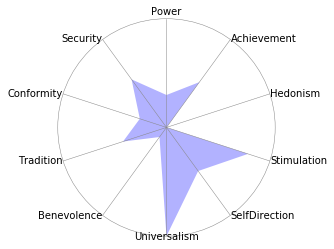

[('Power', 18.893072736224298), ('Achievement', 40.21663632691103), ('Hedonism', 0.0), ('Stimulation', 83.03443540947387), ('SelfDirection', 32.36450496671641), ('Universalism', 107.63432527403825), ('Benevolence', 6.57682000938847), ('Tradition', 38.11266072102369), ('Conformity', 6.982700089979588), ('Security', 37.784740381579)]


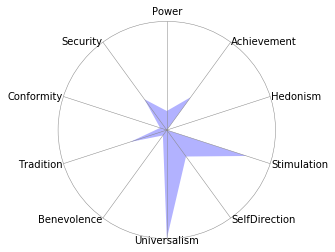

[('Power', 58.63952822028523), ('Achievement', 39.84446734700336), ('Hedonism', 0.0), ('Stimulation', 132.43956560208005), ('SelfDirection', 33.8746404306074), ('Universalism', 40.24509770338628), ('Benevolence', 24.94788623970473), ('Tradition', 104.06754954272236), ('Conformity', 61.54638718462206), ('Security', 52.21193833566218)]


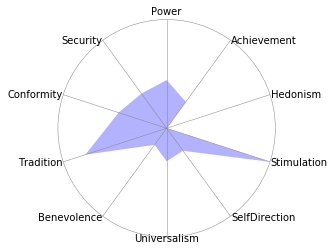

In [30]:
for txt in TXT:
    Score = Text2Score(txt, catalog)
    categories_desired_order = [4,0,3,7,6,9,1,8,2,5]

    CatScore = [(CATEGORIES[i], Score[i]-min(Score)) for i in categories_desired_order]    
    print(CatScore)
    RadarPlot(CatScore)

In [27]:
# Plots a radar chart.

from math import pi
import matplotlib.pyplot as plt

def RadarPlot(CatScore):
    # Set data
    cat = [a[0] for a in CatScore]
    values = [np.abs(a[1]) for a in CatScore]

    N = len(cat)

    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    values += values[:1]
    x_as += x_as[:1]


    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")


    # Create polar plot
    ax = plt.subplot(111, polar=True)


    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    # Set position of y-labels
    ax.set_rlabel_position(0)


    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set yticks
    plt.yticks([],[])


    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

    # Fill area
    ax.fill(x_as, values, 'b', alpha=0.3)


    # Set axes limits
    plt.ylim(0, max(values))


    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 10
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1

        ax.text(angle_rad, max(values) + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


    # Show polar plot
    plt.show()